This is just the imports, and a debug flag.  If you set it equal to true you get more verbose output.

In [1]:
import random
import csv
import math
import operator
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier as knc

debug = False

This is the load dataset method.  It first loads the iris data from iris.data and then splits it based on the split parameter into test and training sets.  It further splits the training set into an x which is the numerical data, and y which is the ground truth for the training set.  The test set is also split into an x and y set, where x data will be used to predict the y value.  It's just easier to work with KNeighborsClassifier with the data sets split this way.

In [2]:
def loadDataset(filename, split, trainingSet=[], testSet=[]):
    with open(filename, 'r') as csvfile:
        lines = csv.reader(csvfile)
        dataset = list(lines)
        # loop through each row
        for x in range(len(dataset)-1):
            for y in range(4):
                dataset[x][y] = float(dataset[x][y])
                # random.random() generate a number [0,1)
            if random.random() < split:
                trainingSet.append(dataset[x])
            else:
                testSet.append(dataset[x]) 
        XTrainingSet = []
        YTrainingSet = []
        for i in range(len(trainingSet)):
            XVals = []
            YTrainingSet.append(trainingSet[i][4])
            for j in range(4):
                XVals.append(trainingSet[i][j])
            XTrainingSet.append(XVals)
               
                
        XTestSet = []
        YTestSet = []
        for i in range(len(testSet)):
            XVals = []
            YTestSet.append(testSet[i][4])
            for j in range(4):
                XVals.append(testSet[i][j])
            XTestSet.append(XVals)
        
        if debug:
            print("TrainingSet:\t", len(trainingSet), "\tXTrain:\t", len(XTrainingSet), "\tYTrain:\t" , len(YTrainingSet))
            print("TestSet:\t", len(testSet), "\tXTest:\t", len(testSet), "\tYTest:\t", len(testSet))
            
    return (XTrainingSet, YTrainingSet, XTestSet, YTestSet)

This is where the magic happens, in KNN.  It's first parameter is K itself.  The second parameter is the split to pass 
along to the load data method.  It loads the dataset, and gets them as I mentioned above back as four sets.
It trains the model with the training sets (x data and y ground truth).  Then it uses the prediction on the x test set
which returns a list of what it predicted the values of x to be.  We then loop through that data and compare it to the 
known ground truth in the y test set for those data points and use that to calculate an accuracy score.  That accuracy
score is returned to the caller.

In [3]:
def k_nearest_neighbors(k, data_split):
    number_wrong = 0
    accuracy = 0
    data_sets = loadDataset('iris.data', data_split, [], [])
    XTrain = data_sets[0]
    YTrain = data_sets[1]
    XTest = data_sets[2]
    YTest = data_sets[3]
    knn = knc(k)
    knn.fit(XTrain,YTrain)
    prediction = knn.predict(XTest)
    numTestCases = len(XTest)
    if debug:
        print ("NumTestCases: ", numTestCases)
    for x in range(numTestCases):
        if YTest[x] != prediction[x]:
            if debug:
                print(YTest[x],":",prediction[x], " was Incorrect")
            number_wrong += 1
    accuracy = ((numTestCases-number_wrong)/numTestCases)*100
    if debug:
        print("Wrong Predictions: ", number_wrong, "Number of Test Cases: ", numTestCases, "Accuracy: ", accuracy)
    return accuracy
    
    




This is the loop that calls k_nearestneighbors.  It is currently configured to cycle 20 times, and for each iteration run 5 knn predictions and take the average accuracy of those runs and later plot them.  I have tinkered with this, because it's seems not to stabalize with 20 iterations of 5.  But when we turn it up much higher, like 20 iterations of 100 averages, it seems much more stable around K being optimized somewhere around k=10.

In [4]:
avgAccuracies = []
split = 0.66
for k in range(21):
    if debug:
        print("Run #", k+1)
        print()
    accuracyForRuns = 0
    for j in range(6):
        if debug:
            print("Subrun number", j)
        accuracyForRuns += k_nearest_neighbors(k+1,split)
    avgAccuracies.append(accuracyForRuns/(j+1))
    if debug:
        print("k=", k+1, "AvgJAccuracies=", avgAccuracies[k])
        print(avgAccuracies)
        

This is the plot.  I increased it's size because I couldn't see it.  It will plot any K chosen above (you have to keep K <= to about 80 because you can't chose a K that is larger than the training dataset). You can also set any number of subruns as J. NOTE:  You need to restart the kernel and start from the beginning for the plot not to shift to the right.  If you chose a large number of subruns the plot can take a while to appear, obviously it's computing in the background.  When only using 5 sub-runs, K doesn't appear to stabalize.  I've tested with 100 subruns, 150, 200, and 250 and it seems K optimizes between 96% and 97% accuracy between 9 and 11.  So I'm calling it 10.

In [5]:
%matplotlib inline

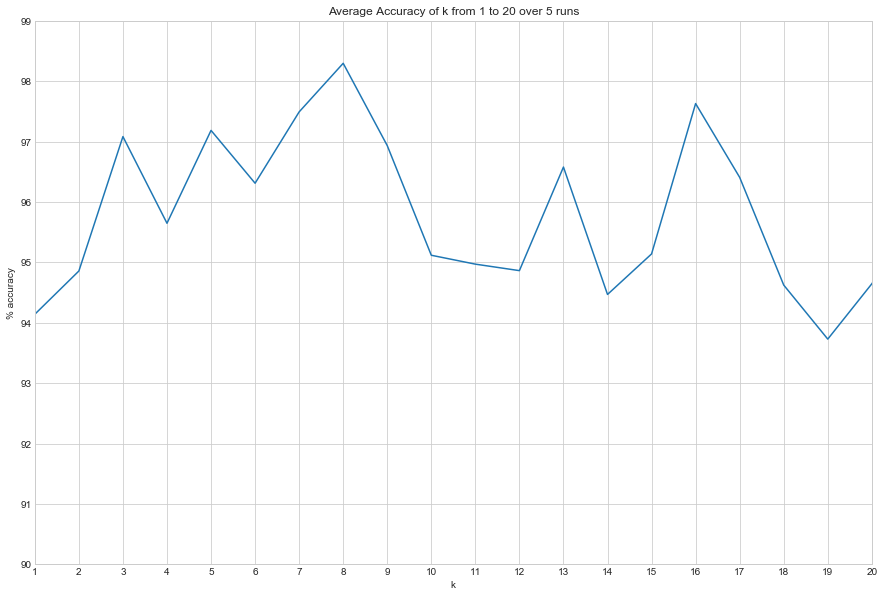

In [6]:
plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize'] = [15, 10]
avgAccuracies.insert(0,0)
length = range(len(avgAccuracies))
plt.plot(length,avgAccuracies)
plt.axis([1,20,90,99])
xmarks = range(1,len(avgAccuracies)-1,1)
plt.xticks(xmarks)
plt.xlabel("k");
plt.ylabel("% accuracy")
title = "Average Accuracy of k from 1 to " +str(k)+ " over "+ str(j)+ " runs"
plt.title(title)
plt.show()